In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("yorumlar.csv")

In [3]:
df.head(10)


,Yorum,Puan
0,Yayınlanma: 15 Aralık 2022Raft Multiplayer and...,NaN
1,Yayınlanma: 20 Aralık 2022The game is absolute...,NaN
2,Yayınlanma: 29 Aralık 2018Erken Erişim İncelem...,NaN
3,Yayınlanma: 10 Eylül 2022Raft is one of my fav...,NaN
4,Yayınlanma: 1 Haziran 2019Erken Erişim İncelem...,NaN
5,Yayınlanma: 9 Haziran 2018Erken Erişim İncelem...,NaN
6,Yayınlanma: 10 Haziran 2018Erken Erişim İncele...,NaN
7,Yayınlanma: 22 Kasım 2018Erken Erişim İnceleme...,NaN
8,Yayınlanma: 27 Ekim 2022Offline single player ...,NaN
9,Yayınlanma: 17 Haziran 2018Erken Erişim İncele...,NaN


In [4]:
df.axes

[RangeIndex(start=0, stop=6776, step=1),
 Index(['Yorum', 'Puan'], dtype='object')]

In [5]:
df["Yorum"] = df['Yorum'].str.replace(r'Yayınlanma: \d+ \w+ \d+', '', regex=True)


In [6]:
df["Yorum"] = df["Yorum"].str.replace(r"Erken Erişim İncelemesi","")

In [7]:
df["Yorum"] = df["Yorum"].str.rstrip(",N/A")

In [8]:
df.to_csv("cleandata.csv", index= False)

In [9]:
bos = df.isna().sum()
print(bos)

Yorum       0
Puan     6776
dtype: int64


In [10]:
data = pd.read_csv("cleandata.csv")

In [11]:
data.head(20)

,Yorum,Puan
0,Raft Multiplayer and Online has a very critica...,NaN
1,"The game is absolutely great. That said, you s...",NaN
2,Raft is a barebones surival game with the nich...,NaN
3,Raft is one of my favorite games. I like to pl...,NaN
4,Raft is a game about juggling a constant strea...,NaN
5,Review for version 1.01bRafts a pretty nifty l...,NaN
6,Its a good game. But after a few hours of play...,NaN
7,"As some other commenters have said, it's not w...",NaN
8,Offline single player needs to be addressed. ...,NaN
9,The game is fun and peaceful but right now the...,NaN


In [12]:
data = data.dropna(subset=["Yorum"])

In [13]:
emp = data.isna().sum()
print(emp)

Yorum       0
Puan     6768
dtype: int64


In [14]:
data.head(5)

,Yorum,Puan
0,Raft Multiplayer and Online has a very critica...,NaN
1,"The game is absolutely great. That said, you s...",NaN
2,Raft is a barebones surival game with the nich...,NaN
3,Raft is one of my favorite games. I like to pl...,NaN
4,Raft is a game about juggling a constant strea...,NaN


In [15]:
data = data.drop("Puan", axis=1)

In [16]:
data.head(5)

,Yorum
0,Raft Multiplayer and Online has a very critica...
1,"The game is absolutely great. That said, you s..."
2,Raft is a barebones surival game with the nich...
3,Raft is one of my favorite games. I like to pl...
4,Raft is a game about juggling a constant strea...


In [17]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [17]:
comment = data["Yorum"].tolist()

In [18]:
vectorizer = CountVectorizer()
countword = vectorizer.fit_transform(comment)
word= vectorizer.get_feature_names()
worddensity =countword.toarray().sum(axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
word_df = pd.DataFrame({"Word": word,"Density":worddensity})
word_df = word_df.sort_values("Density",ascending = False).reset_index(drop=True)

In [20]:
word_df.head(500)

,Word,Density
0,the,18313
1,to,12108
2,and,11102
3,game,9306
4,you,8683
...,...,...
495,wrong,102
496,fixed,101
497,dying,100
498,under,100


In [21]:
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_colwidth', None)
print(word_df.head(800))

              Word  Density
0              the    18313
1               to    12108
2              and    11102
3             game     9306
4              you     8683
5               it     8477
6               is     7077
7               of     6906
8             this     5159
9               in     4278
10             for     4045
11            that     4023
12             but     3728
13            with     3183
14              on     3176
15             not     3144
16            raft     2655
17            just     2543
18            your     2501
19            have     2470
20             are     2205
21              so     2156
22             can     2082
23              my     2048
24              if     2027
25            like     2026
26              be     1919
27             get     1861
28           there     1850
29              no     1841
30              as     1716
31              or     1713
32             was     1654
33             fun     1577
34             all  

In [22]:
sample_size = 1000
sampled_data = df.sample(n=sample_size)

In [23]:
vectorizer = CountVectorizer(ngram_range=(2, 2),max_features=1000)
countword = vectorizer.fit_transform(comment)
word= vectorizer.get_feature_names()
worddensity =countword.toarray().sum(axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
word_group = sorted(list(zip(word,worddensity)), key =lambda x:x[1],reverse = True)[:80]
for w_gro, density in word_group:
    print(f"Word Group: {w_gro},Density: {density}")

Word Group: the game,Density: 3173
Word Group: this game,Density: 2579
Word Group: of the,Density: 1430
Word Group: game is,Density: 1329
Word Group: in the,Density: 1223
Word Group: if you,Density: 1112
Word Group: you can,Density: 865
Word Group: the shark,Density: 785
Word Group: it is,Density: 627
Word Group: to be,Density: 617
Word Group: on the,Density: 614
Word Group: and the,Density: 600
Word Group: your raft,Density: 597
Word Group: to play,Density: 595
Word Group: you have,Density: 592
Word Group: to the,Density: 584
Word Group: there is,Density: 568
Word Group: to do,Density: 568
Word Group: have to,Density: 565
Word Group: to get,Density: 553
Word Group: this is,Density: 518
Word Group: for the,Density: 500
Word Group: the story,Density: 496
Word Group: the raft,Density: 476
Word Group: with the,Density: 461
Word Group: you re,Density: 417
Word Group: you are,Density: 402
Word Group: the same,Density: 397
Word Group: game but,Density: 378
Word Group: want to,Density: 376
Wo

In [25]:
vectorizer = CountVectorizer(ngram_range=(3, 3),max_features=1000)
countword = vectorizer.fit_transform(comment)
word= vectorizer.get_feature_names()
worddensity =countword.toarray().sum(axis=0)

In [26]:
word_group = sorted(list(zip(word,worddensity)), key =lambda x:x[1],reverse = True)[:100]
for w_gro, density in word_group:
    print(f"Word Group: {w_gro},Density: {density}")

Word Group: this game is,Density: 574
Word Group: the game is,Density: 507
Word Group: of the game,Density: 399
Word Group: you have to,Density: 271
Word Group: in the game,Density: 232
Word Group: boring boring boring,Density: 218
Word Group: in this game,Density: 181
Word Group: there is no,Density: 174
Word Group: you need to,Density: 156
Word Group: the game and,Density: 140
Word Group: over and over,Density: 134
Word Group: food and water,Density: 131
Word Group: recommend this game,Density: 129
Word Group: to play with,Density: 129
Word Group: the shark is,Density: 121
Word Group: this game has,Density: 117
Word Group: you want to,Density: 117
Word Group: in the water,Density: 108
Word Group: one of the,Density: 103
Word Group: of this game,Density: 102
Word Group: this game but,Density: 102
Word Group: if you want,Density: 100
Word Group: in early access,Density: 100
Word Group: if you are,Density: 99
Word Group: if you re,Density: 98
Word Group: the game has,Density: 90
Word Gr

In [27]:
vectorizer = CountVectorizer(ngram_range=(4, 4),max_features=1000)
countword = vectorizer.fit_transform(comment)
word= vectorizer.get_feature_names()
worddensity =countword.toarray().sum(axis=0)

In [28]:
word_group = sorted(list(zip(word,worddensity)), key =lambda x:x[1],reverse = True)[:100]
for w_gro, density in word_group:
    print(f"Word Group: {w_gro},Density: {density}")

Word Group: boring boring boring boring,Density: 217
Word Group: of the game is,Density: 79
Word Group: in the middle of,Density: 62
Word Group: if you want to,Density: 56
Word Group: the middle of the,Density: 53
Word Group: over and over again,Density: 50
Word Group: to play the game,Density: 41
Word Group: middle of the ocean,Density: 40
Word Group: the end of the,Density: 40
Word Group: to play with friends,Density: 40
Word Group: part of the game,Density: 37
Word Group: the game is fun,Density: 36
Word Group: very boring and repetitive,Density: 36
Word Group: and repetitive very boring,Density: 34
Word Group: boring and repetitive very,Density: 34
Word Group: repetitive very boring and,Density: 34
Word Group: this game is not,Density: 34
Word Group: to like this game,Density: 33
Word Group: to play this game,Density: 33
Word Group: most of the time,Density: 31
Word Group: not much to do,Density: 31
Word Group: the game is very,Density: 31
Word Group: to eat and drink,Density: 31
W

In [29]:
vectorizer = CountVectorizer(ngram_range=(5, 5),max_features=1000)
countword = vectorizer.fit_transform(comment)
word= vectorizer.get_feature_names()
worddensity =countword.toarray().sum(axis=0)
word_group = sorted(list(zip(word,worddensity)), key =lambda x:x[1],reverse = True)[:50]
for w_gro, density in word_group:
    print(f"Word Group: {w_gro},Density: {density}")

Word Group: boring boring boring boring boring,Density: 216
Word Group: in the middle of the,Density: 44
Word Group: the middle of the ocean,Density: 40
Word Group: and repetitive very boring and,Density: 34
Word Group: boring and repetitive very boring,Density: 34
Word Group: repetitive very boring and repetitive,Density: 34
Word Group: very boring and repetitive very,Density: 34
Word Group: the end of the game,Density: 23
Word Group: over and over and over,Density: 21
Word Group: same thing over and over,Density: 19
Word Group: for the first few hours,Density: 17
Word Group: there is nothing to do,Density: 17
Word Group: to like this game but,Density: 17
Word Group: at the end of the,Density: 16
Word Group: the same thing over and,Density: 16
Word Group: to figure out how to,Density: 16
Word Group: wanted to like this game,Density: 16
Word Group: do not buy this game,Density: 15
Word Group: spend most of your time,Density: 15
Word Group: have to eat and drink,Density: 14
Word Group: 

In [30]:
vectorizer = CountVectorizer(ngram_range=(6, 6),max_features=1000)
countword = vectorizer.fit_transform(comment)
word= vectorizer.get_feature_names()
worddensity =countword.toarray().sum(axis=0)
word_group = sorted(list(zip(word,worddensity)), key =lambda x:x[1],reverse = True)[:50]
for w_gro, density in word_group:
    print(f"Word Group: {w_gro},Density: {density}")

Word Group: boring boring boring boring boring boring,Density: 215
Word Group: in the middle of the ocean,Density: 35
Word Group: and repetitive very boring and repetitive,Density: 34
Word Group: boring and repetitive very boring and,Density: 34
Word Group: very boring and repetitive very boring,Density: 34
Word Group: repetitive very boring and repetitive very,Density: 33
Word Group: the same thing over and over,Density: 16
Word Group: need to update we need to,Density: 14
Word Group: this is the game for you,Density: 13
Word Group: hungry your thirstyyour hungry your thirstyyour,Density: 11
Word Group: no no no no no no,Density: 11
Word Group: same thing over and over again,Density: 11
Word Group: thirstyyour hungry your thirstyyour hungry your,Density: 11
Word Group: your thirstyyour hungry your thirstyyour hungry,Density: 11
Word Group: at the end of the game,Density: 9
Word Group: really wanted to like this game,Density: 9
Word Group: you have to eat and drink,Density: 9
Word Grou

In [31]:
vectorizer = CountVectorizer(ngram_range=(7, 7),max_features=1000)
countword = vectorizer.fit_transform(comment)
word= vectorizer.get_feature_names()
worddensity =countword.toarray().sum(axis=0)
word_group = sorted(list(zip(word,worddensity)), key =lambda x:x[1],reverse = True)[:20]
for w_gro, density in word_group:
    print(f"Word Group: {w_gro},Density: {density}")

Word Group: boring boring boring boring boring boring boring,Density: 214
Word Group: boring and repetitive very boring and repetitive,Density: 34
Word Group: very boring and repetitive very boring and,Density: 34
Word Group: and repetitive very boring and repetitive very,Density: 33
Word Group: repetitive very boring and repetitive very boring,Density: 33
Word Group: hungry your thirstyyour hungry your thirstyyour hungry,Density: 11
Word Group: your thirstyyour hungry your thirstyyour hungry your,Density: 11
Word Group: thirstyyour hungry your thirstyyour hungry your thirstyyour,Density: 10
Word Group: no no no no no no no,Density: 9
Word Group: the same thing over and over again,Density: 9
Word Group: doing the same thing over and over,Density: 8
Word Group: in the middle of the ocean with,Density: 8
Word Group: need to update we need to update,Density: 8
Word Group: we need to update we need to,Density: 8
Word Group: over and over and over and over,Density: 7
Word Group: to update w

In [32]:
vectorizer = CountVectorizer(ngram_range=(8, 8),max_features=1000)
countword = vectorizer.fit_transform(comment)
word= vectorizer.get_feature_names()
worddensity =countword.toarray().sum(axis=0)
word_group = sorted(list(zip(word,worddensity)), key =lambda x:x[1],reverse = True)[:20]
for w_gro, density in word_group:
    print(f"Word Group: {w_gro},Density: {density}")

Word Group: boring boring boring boring boring boring boring boring,Density: 213
Word Group: very boring and repetitive very boring and repetitive,Density: 34
Word Group: and repetitive very boring and repetitive very boring,Density: 33
Word Group: boring and repetitive very boring and repetitive very,Density: 33
Word Group: repetitive very boring and repetitive very boring and,Density: 33
Word Group: hungry your thirstyyour hungry your thirstyyour hungry your,Density: 11
Word Group: thirstyyour hungry your thirstyyour hungry your thirstyyour hungry,Density: 10
Word Group: your thirstyyour hungry your thirstyyour hungry your thirstyyour,Density: 10
Word Group: no no no no no no no no,Density: 8
Word Group: need to update we need to update we,Density: 7
Word Group: to update we need to update we need,Density: 7
Word Group: update we need to update we need to,Density: 7
Word Group: beehive fuel boat get bees make beehive fuel,Density: 6
Word Group: bees make beehive fuel boat get bees ma

In [33]:
vectorizer = CountVectorizer(ngram_range=(10,10),max_features=1000)
countword = vectorizer.fit_transform(comment)
word= vectorizer.get_feature_names()
worddensity =countword.toarray().sum(axis=0)
word_group = sorted(list(zip(word,worddensity)), key =lambda x:x[1],reverse = True)[:20]
for w_gro, density in word_group:
    print(f"Word Group: {w_gro},Density: {density}")

Word Group: boring boring boring boring boring boring boring boring boring boring,Density: 211
Word Group: and repetitive very boring and repetitive very boring and repetitive,Density: 33
Word Group: boring and repetitive very boring and repetitive very boring and,Density: 33
Word Group: very boring and repetitive very boring and repetitive very boring,Density: 33
Word Group: repetitive very boring and repetitive very boring and repetitive very,Density: 32
Word Group: hungry your thirstyyour hungry your thirstyyour hungry your thirstyyour hungry,Density: 10
Word Group: your thirstyyour hungry your thirstyyour hungry your thirstyyour hungry your,Density: 10
Word Group: thirstyyour hungry your thirstyyour hungry your thirstyyour hungry your thirstyyour,Density: 9
Word Group: need to update we need to update we need to,Density: 7
Word Group: bees make beehive fuel boat get bees make beehive fuel,Density: 6
Word Group: check if you can run paint potato decent fast rich,Density: 6
Word Grou

In [18]:
print(type(data))


<class 'pandas.core.frame.DataFrame'>


In [56]:
sütun_adı = 'Yorum'
kelimeler = ['bored', 'boring']

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda 'bored' veya 'boring' kelimeleri geçiyor.".format(toplam_sayac))


Toplamda 1206 satırda 'bored' veya 'boring' kelimeleri geçiyor.


In [20]:
sütun_adı = 'Yorum'
kelimeler = ['mistake', "bug"]

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda 'bug' ve 'mistake' kelimeleri geçiyor.".format(toplam_sayac))


Toplamda 468 satırda 'bug' ve 'mistake' kelimeleri geçiyor.


In [21]:
sütun_adı = 'Yorum'
kelimeler = ["stuck"]

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda 'stuck' kelimeleri geçiyor.".format(toplam_sayac))


Toplamda 173 satırda 'stuck' kelimeleri geçiyor.


In [22]:
sütun_adı = 'Yorum'
kelimeler = ["hunger","thirst","hungery","thirsty"]

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda {} kelimeleri geçiyor.".format(toplam_sayac,kelimeler))


Toplamda 422 satırda ['hunger', 'thirst', 'hungery', 'thirsty'] kelimeleri geçiyor.


In [23]:
sütun_adı = 'Yorum'
kelimeler = ["difficulty"]

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda {} kelimeleri geçiyor.".format(toplam_sayac,kelimeler))


Toplamda 134 satırda ['difficulty'] kelimeleri geçiyor.


In [24]:
sütun_adı = 'Yorum'
kelimeler = ["mechanics"]

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda {} kelimeleri geçiyor.".format(toplam_sayac,kelimeler))

Toplamda 235 satırda ['mechanics'] kelimeleri geçiyor.


In [25]:
sütun_adı = 'Yorum'
kelimeler = ["graphic"]

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda {} kelimeleri geçiyor.".format(toplam_sayac,kelimeler))

Toplamda 156 satırda ['graphic'] kelimeleri geçiyor.


In [26]:
sütun_adı = 'Yorum'
kelimeler = ["story"]

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda {} kelimeleri geçiyor.".format(toplam_sayac,kelimeler))

Toplamda 558 satırda ['story'] kelimeleri geçiyor.


In [27]:
sütun_adı = 'Yorum'
kelimeler = ["bosses","boss"]

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda {} kelimeleri geçiyor.".format(toplam_sayac,kelimeler))

Toplamda 127 satırda ['bosses', 'boss'] kelimeleri geçiyor.


In [28]:
sütun_adı = 'Yorum'
kelimeler = ["levels","level"]

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda {} kelimeleri geçiyor.".format(toplam_sayac,kelimeler))

Toplamda 111 satırda ['levels', 'level'] kelimeleri geçiyor.


In [29]:
sütun_adı = 'Yorum'
kelimeler = ["Soundtrack","music"]

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda {} kelimeleri geçiyor.".format(toplam_sayac,kelimeler))

Toplamda 39 satırda ['Soundtrack', 'music'] kelimeleri geçiyor.


In [31]:
sütun_adı = 'Yorum'
kelimeler = ["small world","map","small map","few islands","map size","limited map","small island","little island","island"]

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda {} kelimeleri geçiyor.".format(toplam_sayac,kelimeler))

Toplamda 941 satırda ['small world', 'map', 'small map', 'few islands', 'map size', 'limited map', 'small island', 'little island', 'island'] kelimeleri geçiyor.


In [34]:
sütun_adı = 'Yorum'
kelimeler = ["game end","endgame"]

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda {} kelimeleri geçiyor.".format(toplam_sayac,kelimeler))

Toplamda 43 satırda ['game end', 'endgame'] kelimeleri geçiyor.


In [35]:
sütun_adı = 'Yorum'
kelimeler = ["repetitive"]

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda {} kelimeleri geçiyor.".format(toplam_sayac,kelimeler))

Toplamda 243 satırda ['repetitive'] kelimeleri geçiyor.


In [36]:
sütun_adı = 'Yorum'
kelimeler = ["solo"]

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda {} kelimeleri geçiyor.".format(toplam_sayac,kelimeler))

Toplamda 172 satırda ['solo'] kelimeleri geçiyor.


In [39]:
sütun_adı = 'Yorum'
kelimeler = ["combat","fight","attack mechanics"]

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda {} kelimeleri geçiyor.".format(toplam_sayac,kelimeler))

Toplamda 340 satırda ['combat', 'fight', 'attack mechanics'] kelimeleri geçiyor.


In [41]:
sütun_adı = 'Yorum'
kelimeler = ["bird"]

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda {} kelimeleri geçiyor.".format(toplam_sayac,kelimeler))

Toplamda 153 satırda ['bird'] kelimeleri geçiyor.


In [42]:
sütun_adı = 'Yorum'
kelimeler = ["shark"]

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda {} kelimeleri geçiyor.".format(toplam_sayac,kelimeler))

Toplamda 1043 satırda ['shark'] kelimeleri geçiyor.


In [44]:
sütun_adı = 'Yorum'
kelimeler = ["puzzle","puzzles"]

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda {} kelimeleri geçiyor.".format(toplam_sayac,kelimeler))

Toplamda 309 satırda ['puzzle', 'puzzles'] kelimeleri geçiyor.


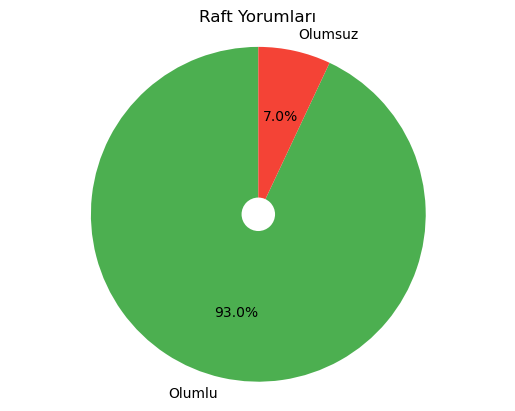

In [50]:
sizes = [93, 7]
labels = ['Olumlu', 'Olumsuz']
colors = ['#4CAF50', '#F44336']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0, 0), 0.10, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Raft Yorumları')
plt.show()

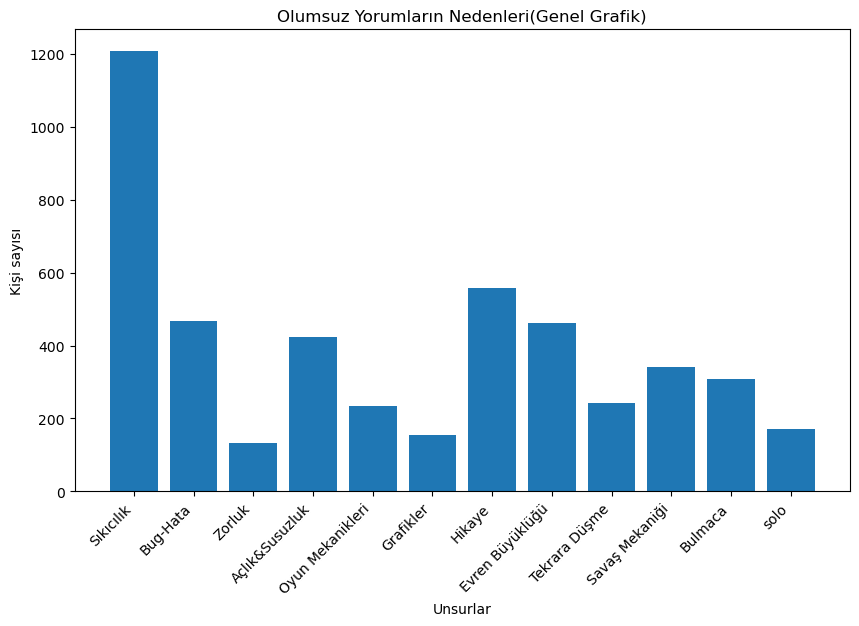

In [54]:
kelimeler = ['Sıkıcılık', 'Bug-Hata', 'Zorluk', 'Açlık&Susuzluk', 'Oyun Mekanikleri', 'Grafikler', 'Hikaye',"Evren Büyüklüğü","Tekrara Düşme","Savaş Mekaniği","Bulmaca","solo"]
adetler = [1206,468,134,422,235,156,558,461,243,340,309,172]
plt.figure(figsize=(10, 6))
plt.bar(kelimeler, adetler)
plt.title('Olumsuz Yorumların Nedenleri(Genel Grafik)')
plt.xlabel('Unsurlar')
plt.ylabel('Kişi sayısı')
plt.xticks(rotation=45, ha='right')
plt.show()

In [68]:
bored_count = len(data[data['Yorum'].str.contains('bored', case=False)])
boring_count = len(data[data['Yorum'].str.contains('boring', case=False)])


gruplar = [('bug', 'mistake', 'stuck'),
           ('difficulty',),
           ('hunger', 'hungry', 'thirst', 'thirsty'),
           ('mechanics',),
           ('graphics', 'graphic'),
           ('story',),
           ('music',),
           ('level',),
           ('small map', 'small island', 'island'),
           ('game end',),
           ('repetitive',),
           ('solo',),
           ('combat', 'attack', 'fight'),
           ('puzzles',),
           ('shark',),
           ('bird',)]

grup_sayilari = {}
for grup in gruplar:
    grup_sayilari[grup] = len(data[data['Yorum'].str.contains('|'.join(grup), case=False)])


print("Bored sayısı:", bored_count)
print("Boring sayısı:", boring_count)
for i, grup in enumerate(gruplar):
    print("Grup {}: {} kez geçiyor.".format(i+1, grup_sayilari[grup]))

Bored sayısı: 145
Boring sayısı: 1061
Grup 1: 607 kez geçiyor.
Grup 2: 134 kez geçiyor.
Grup 3: 270 kez geçiyor.
Grup 4: 235 kez geçiyor.
Grup 5: 156 kez geçiyor.
Grup 6: 558 kez geçiyor.
Grup 7: 39 kez geçiyor.
Grup 8: 93 kez geçiyor.
Grup 9: 866 kez geçiyor.
Grup 10: 6 kez geçiyor.
Grup 11: 243 kez geçiyor.
Grup 12: 172 kez geçiyor.
Grup 13: 520 kez geçiyor.
Grup 14: 137 kez geçiyor.
Grup 15: 1043 kez geçiyor.
Grup 16: 153 kez geçiyor.


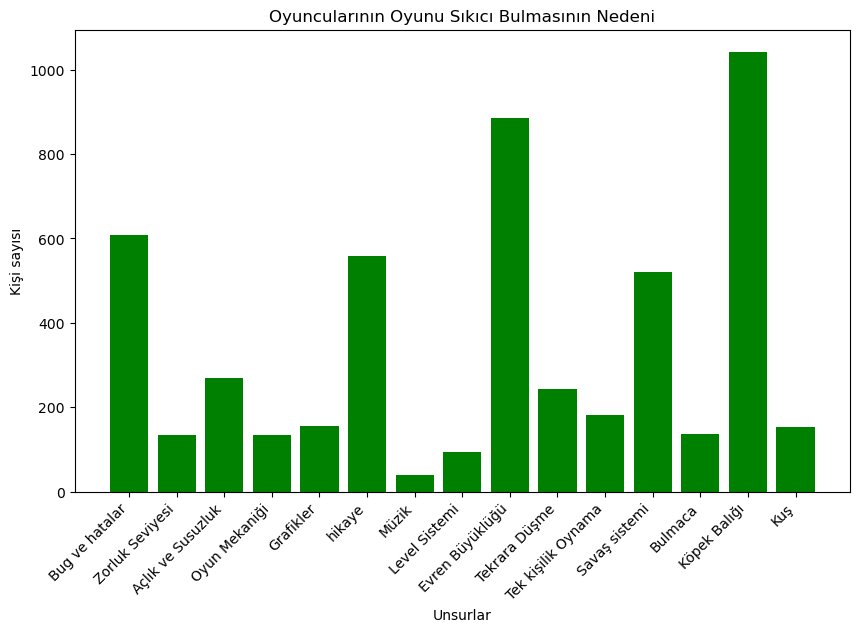

In [102]:
kelimeler = ["Bug ve hatalar","Zorluk Seviyesi","Açlık ve Susuzluk","Oyun Mekaniği","Grafikler","hikaye","Müzik","Level Sistemi","Evren Büyüklüğü","Tekrara Düşme","Tek kişilik Oynama","Savaş sistemi","Bulmaca","Köpek Balığı","Kuş"]
adetler = [607,134,270,135,156,558,39,93,886,243,182,520,137,1043,153]
plt.figure(figsize=(10, 6))
plt.bar(kelimeler, adetler,color="green")
plt.title('Oyuncularının Oyunu Sıkıcı Bulmasının Nedeni')
plt.xlabel('Unsurlar')
plt.ylabel('Kişi sayısı')
plt.xticks(rotation=45, ha='right')
plt.show()


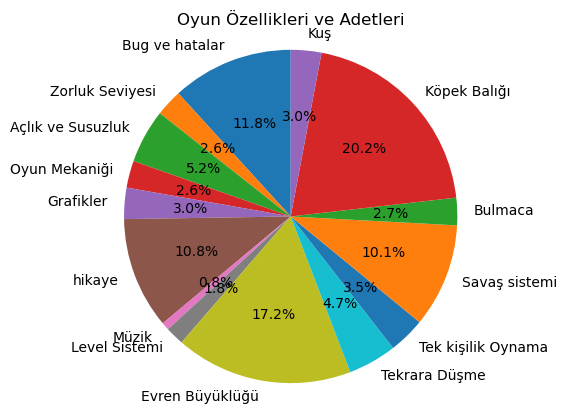

In [78]:
plt.pie(adetler, labels=kelimeler, autopct='%1.1f%%', startangle=90)
plt.title('Oyun Özellikleri ve Adetleri')
plt.axis('equal')
plt.show()

In [ ]:
#Aynı zamanda bug konusundan dolayı yorum yapan 468 kullanıcıdan 173'ü oyunda bir yere sıkıştıklarını ve hareket edemeyip bugta kaldıklarını belirtmiş.
#yüzde 36.97'ye denk gelmektedir.

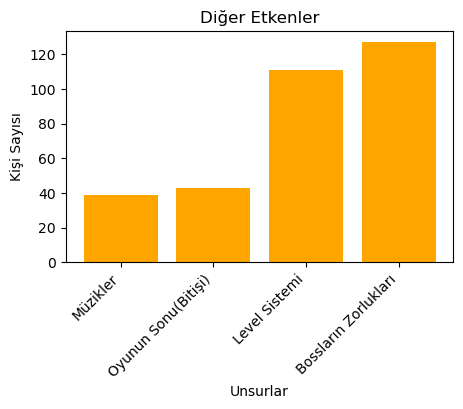

In [100]:
kelimeler = ["Bossların Zorlukları", "Müzikler", "Level Sistemi", "Oyunun Sonu(Bitişi)"]
adetler = [127, 39, 111, 43]

veriler = list(zip(kelimeler, adetler))
veriler = sorted(veriler, key=lambda x: x[1])
kelimeler, adetler = zip(*veriler)

plt.figure(figsize=(5, 3))
plt.bar(kelimeler, adetler,color="orange")
plt.title("Diğer Etkenler")
plt.xlabel("Unsurlar")
plt.ylabel("Kişi Sayısı")
plt.xticks(rotation=45, ha="right")
plt.show()


In [108]:
sütun_adı = 'Yorum'
kelimeler = ["suggest","suggestion","request","want"]

def sayac(row):
    count = 0
    for kelime in kelimeler:
        if kelime in row.lower():
            count += 1
    return count

toplam_sayac = data[sütun_adı].apply(sayac).sum()

print("Toplamda {} satırda {} kelimeleri geçiyor.".format(toplam_sayac,kelimeler))

Toplamda 634 satırda ['suggest', 'suggestion', 'request', 'want'] kelimeleri geçiyor.


In [111]:
import re

keywords = ['suggest', 'suggestion', 'request', 'want']
suggested_sentences = []
for comment in data['Yorum']:
    sentences = re.split(r'[.!?]', comment)  
    for sentence in sentences:
        if any(keyword in sentence for keyword in keywords):
            suggested_sentences.append(sentence.strip())
            
for sentence in suggested_sentences:
    print(sentence)


22 the Developers published a patch with the patchnote:"We just wanted to let you know that we have just now pushed a small update containing a rework of the multiplayer network code, to increase security for hosts and clients
Now when I click the Open Data Privacy Page button as suggested by support, nothing happens
Your primary challenges include:* cooking and eating a potato every 2 minutes to not fall behind on hunger* desalinating water every 2 minutes to not fall behind on thirst or watering crops* planting potatoes every 6 minutes to not run out* chasing a demented, rabid seagul from your crops every time you step away* chasing a demented, rabid shark from your raft every 10 minutes or so, like clockwork* picking enough trash out of the ocean to feed recurring resource costs, since literally every action ultimately consumes some amount of wood, plastic, leaves, scrap, or stoneIf you want to do anything else, you must fit it into the above somewhere, severely limiting your prospe